# QoQ Growth Calculation

In [5]:
import pandas as pd
import numpy as np

# Load the data
revenue_trends = pd.read_csv('../data/revenue_trends.csv')

# Convert order_month to datetime
revenue_trends['order_month'] = pd.to_datetime(revenue_trends['order_month'])

# Extract year and quarter
revenue_trends['year'] = revenue_trends['order_month'].dt.year
revenue_trends['quarter'] = revenue_trends['order_month'].dt.quarter
revenue_trends['year_quarter'] = revenue_trends['year'].astype(str) + '-Q' + revenue_trends['quarter'].astype(str)

# Group by quarter and sum revenue
quarterly_revenue = revenue_trends.groupby('year_quarter').agg({
    'revenue': 'sum',
    'profit': 'sum',
    'total_orders': 'sum'
}).reset_index()

# Sort by year_quarter
quarterly_revenue = quarterly_revenue.sort_values('year_quarter').reset_index(drop=True)

# Calculate QoQ growth
quarterly_revenue['qoq_growth_pct'] = quarterly_revenue['revenue'].pct_change() * 100

# Calculate average QoQ growth (excluding first quarter which has no prior comparison)
avg_qoq_growth = quarterly_revenue['qoq_growth_pct'].dropna().mean()

print("="*70)
print("QUARTER-OVER-QUARTER (QoQ) REVENUE GROWTH ANALYSIS")
print("="*70)
print("\nQuarterly Revenue Summary:")
print(quarterly_revenue.to_string(index=False))
print("\n" + "="*70)
print(f"📊 AVERAGE QoQ GROWTH: {avg_qoq_growth:.2f}%")
print("="*70)

# Additional statistics
print("\n📈 QoQ Growth Statistics:")
print(f"   Minimum QoQ Growth: {quarterly_revenue['qoq_growth_pct'].min():.2f}%")
print(f"   Maximum QoQ Growth: {quarterly_revenue['qoq_growth_pct'].max():.2f}%")
print(f"   Median QoQ Growth: {quarterly_revenue['qoq_growth_pct'].median():.2f}%")
print(f"   Standard Deviation: {quarterly_revenue['qoq_growth_pct'].std():.2f}%")

# Show recent quarters (last 8 quarters = 2 years)
print("\nRecent 8 Quarters Performance:")
recent_quarters = quarterly_revenue.tail(8)[['year_quarter', 'revenue', 'qoq_growth_pct']]
print(recent_quarters.to_string(index=False))

QUARTER-OVER-QUARTER (QoQ) REVENUE GROWTH ANALYSIS

Quarterly Revenue Summary:
year_quarter    revenue    profit  total_orders  qoq_growth_pct
     2019-Q1    5663.28   2969.26            71             NaN
     2019-Q2   16129.74   8254.71           194      184.812688
     2019-Q3   26405.26  13785.96           289       63.705429
     2019-Q4   44318.15  23140.25           469       67.838340
     2020-Q1   53502.54  27708.45           589       20.723767
     2020-Q2   73522.05  38041.11           802       37.417868
     2020-Q3   77210.95  40094.68           900        5.017406
     2020-Q4   93363.89  48652.18          1065       20.920530
     2021-Q1  109277.30  57003.91          1177       17.044502
     2021-Q2  117796.93  61388.08          1351        7.796340
     2021-Q3  128477.59  66285.50          1573        9.067010
     2021-Q4  153362.10  79938.52          1759       19.368755
     2022-Q1  169814.98  88073.00          1912       10.728126
     2022-Q2  181473.84  

In [7]:
# Compare different time periods
print("\n" + "="*70)
print("GROWTH COMPARISON: DIFFERENT TIME PERIODS")
print("="*70)

# Monthly average
monthly_growth = revenue_trends['pct_of_revenue_growth'].mean()
print(f"Average Monthly Growth (MoM): {monthly_growth:.2f}%")

# Quarterly average
print(f"Average Quarterly Growth (QoQ): {avg_qoq_growth:.2f}%")

# Calculate CAGR for overall period
start_revenue = quarterly_revenue['revenue'].iloc[0]
end_revenue = quarterly_revenue['revenue'].iloc[-1]
num_quarters = len(quarterly_revenue) - 1
cagr_quarterly = ((end_revenue / start_revenue) ** (4 / num_quarters) - 1) * 100

print(f"Annualized Growth (CAGR): {cagr_quarterly:.2f}%")
print("="*70)


GROWTH COMPARISON: DIFFERENT TIME PERIODS
Average Monthly Growth (MoM): 9.56%
Average Quarterly Growth (QoQ): 24.31%
Annualized Growth (CAGR): 115.64%


Saved: quarterly_growth_analysis.png


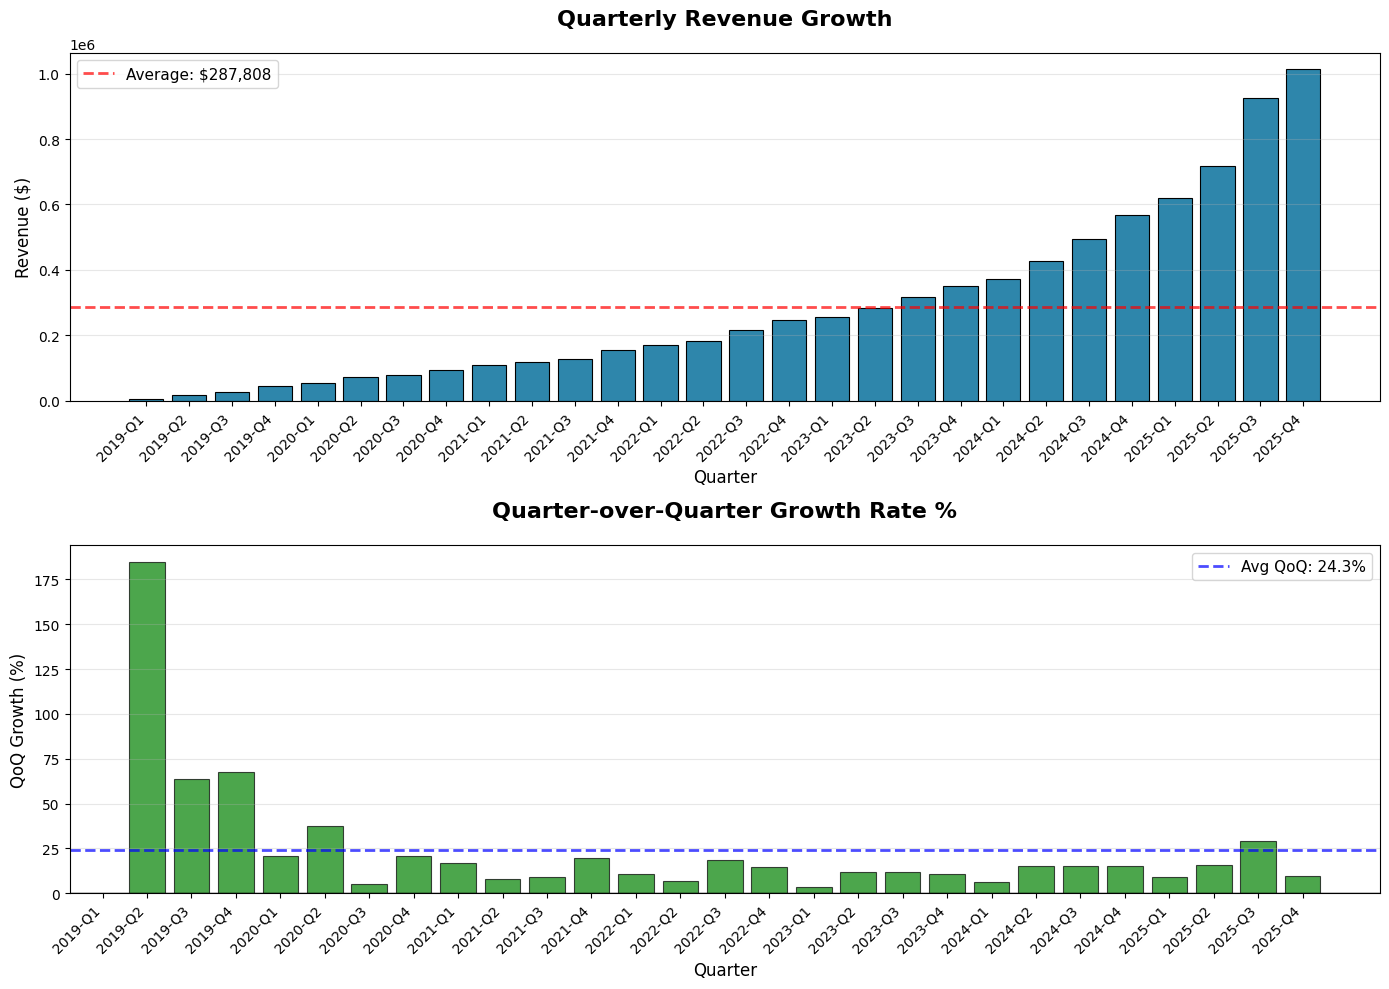

In [10]:
import matplotlib.pyplot as plt

# Create visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Quarterly Revenue
ax1.bar(range(len(quarterly_revenue)), quarterly_revenue['revenue'], 
        color='#2E86AB', edgecolor='black', linewidth=0.8)
ax1.set_title('Quarterly Revenue Growth', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Quarter', fontsize=12)
ax1.set_ylabel('Revenue ($)', fontsize=12)
ax1.set_xticks(range(len(quarterly_revenue)))
ax1.set_xticklabels(quarterly_revenue['year_quarter'], rotation=45, ha='right')
ax1.grid(True, alpha=0.3, axis='y')

# Add average line
avg_revenue = quarterly_revenue['revenue'].mean()
ax1.axhline(y=avg_revenue, color='red', linestyle='--', linewidth=2, 
           label=f'Average: ${avg_revenue:,.0f}', alpha=0.7)
ax1.legend(fontsize=11)

# Plot 2: QoQ Growth Rate
colors = ['green' if x > 0 else 'red' for x in quarterly_revenue['qoq_growth_pct'].fillna(0)]
ax2.bar(range(len(quarterly_revenue)), quarterly_revenue['qoq_growth_pct'], 
        color=colors, edgecolor='black', linewidth=0.8, alpha=0.7)
ax2.set_title('Quarter-over-Quarter Growth Rate %', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Quarter', fontsize=12)
ax2.set_ylabel('QoQ Growth (%)', fontsize=12)
ax2.set_xticks(range(len(quarterly_revenue)))
ax2.set_xticklabels(quarterly_revenue['year_quarter'], rotation=45, ha='right')
ax2.axhline(y=0, color='black', linewidth=1)
ax2.grid(True, alpha=0.3, axis='y')

# Add average line
ax2.axhline(y=avg_qoq_growth, color='blue', linestyle='--', linewidth=2, 
           label=f'Avg QoQ: {avg_qoq_growth:.1f}%', alpha=0.7)
ax2.legend(fontsize=11)

plt.tight_layout()
plt.savefig('../images/quarterly_growth_analysis.png', dpi=300, bbox_inches='tight')
print("Saved: quarterly_growth_analysis.png")
plt.show()